# Random Forest Models

This notebook tests random forest model code and checks metrics for the rf model. Used to refine and train the rf models.

In [4]:
import sys
sys.path.append("../src")
%load_ext autoreload
%autoreload 2

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
from project import rf_models, preprocessing

## Testing Basic Random Forest Model Code

In [7]:
df = pd.read_csv("../data/initial_custody_2017_gsprs.csv", low_memory=False)

# preprocessing
data = preprocessing.preprocess_input_vars(df)
data = data[
    [
        "gender_female",
        "age_gt_45",
        "age_lt_25",
        "race_B",
        "race_A",
        "race_H",
        "race_I",
        "race_O",
        "off_1_prs_max",
        "off_1_gs_max",
        "ic_custdy_level",
        "prior_commits",
        "ic_institut_adj",
        "escape_hist_1",
        "escape_hist_2",
        "escape_hist_3",
        "escape_hist_4",
        "escape_hist_5",
        "mrt_stat_DIV",
        "mrt_stat_SEP",
        "mrt_stat_MAR",
        "mrt_stat_WID",
        "employed"
    ]
]
data = data.dropna()
X = data.drop("ic_custdy_level", axis=1)
Y = data["ic_custdy_level"]

rf = rf_models.BasicRFModel(X, Y)
rf.fit()

In [8]:
# Checking accuracy and roc
print(rf.get_accuracy())

0.7941389290882779


In [9]:
importances = rf.model.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in rf.model.estimators_], axis=0)

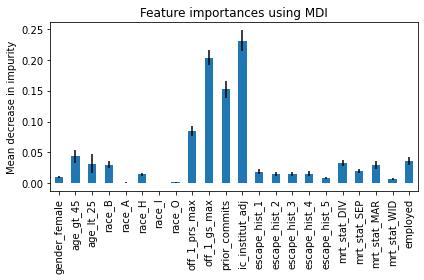

In [10]:
feature_names = list(X.columns)
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [11]:
forest_importances

gender_female      0.010428
age_gt_45          0.043245
age_lt_25          0.031641
race_B             0.029704
race_A             0.000819
race_H             0.014046
race_I             0.000262
race_O             0.001373
off_1_prs_max      0.085073
off_1_gs_max       0.203433
prior_commits      0.151946
ic_institut_adj    0.231155
escape_hist_1      0.018644
escape_hist_2      0.014761
escape_hist_3      0.014861
escape_hist_4      0.015522
escape_hist_5      0.008229
mrt_stat_DIV       0.032546
mrt_stat_SEP       0.020027
mrt_stat_MAR       0.029521
mrt_stat_WID       0.006679
employed           0.036086
dtype: float64

In [12]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn.metrics import roc_auc_score

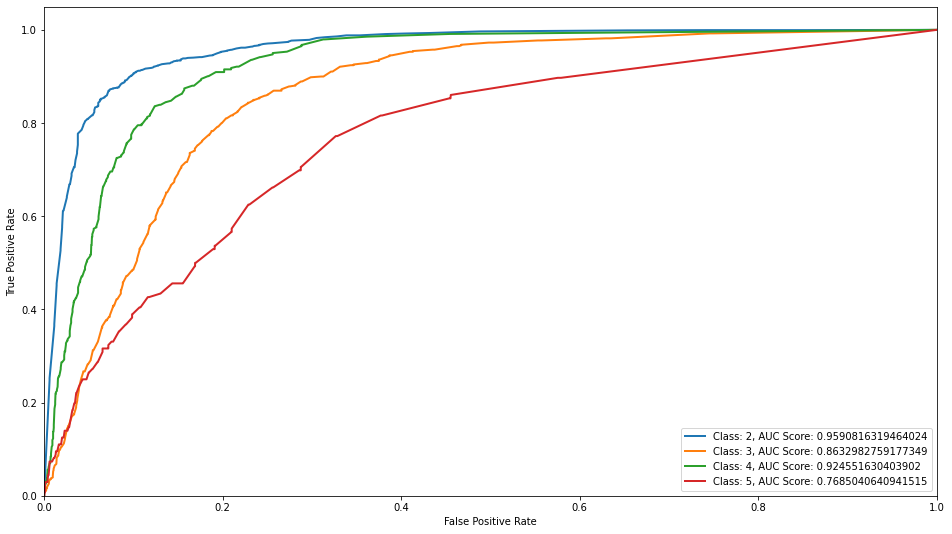

In [25]:
y_score = rf.model.predict_proba(rf.X_test)
y_test_bin = label_binarize(rf.Y_test, classes=[2, 3, 4, 5])
n_classes = y_test_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

_, ax = plt.subplots(1, 1, figsize=(16, 9))

for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
  plt.plot(fpr[i], tpr[i], lw=2, label=f"Class: {i+2}, AUC Score: {auc(fpr[i], tpr[i])}")

ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend();

## Attempting Reclass random forest

In [18]:
df = pd.read_csv("../data/re_custody_2017_gsprs.csv")

c:\Dev\psapm\env\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [19]:
data = preprocessing.preprocess_input_vars_re(df)
data = data[
    [
        "gender_female",
        "age",
        "race_B",
        "race_A",
        "race_H",
        "race_I",
        "race_O",
        "off_1_prs_max",
        "off_1_gs_max",
        "re_custody_level",
        "ic_custdy_level",
        "prior_commits",
        "re_discip_reports",
        "re_escp_hist_1",
        "re_escp_hist_2",
        "re_escp_hist_3",
        "re_escp_hist_4",
        "re_escp_hist_5"
    ]
]
data = data.dropna()
X = data.drop("re_custody_level", axis=1)
Y = data["re_custody_level"]

rf = rf_models.BasicRFModel(X, Y)
rf.fit()

In [20]:
rf.get_accuracy()

0.783533447684391

In [21]:
re_importances = rf.model.feature_importances_

std = np.std([
    tree.feature_importances_ for tree in rf.model.estimators_], axis=0)
re_feature_names = list(X.columns)
re_forest_importances = pd.Series(re_importances, index=re_feature_names)


In [22]:
re_forest_importances

gender_female        0.005832
age                  0.190076
race_B               0.017694
race_A               0.000348
race_H               0.011460
race_I               0.000389
race_O               0.001195
off_1_prs_max        0.064328
off_1_gs_max         0.089427
ic_custdy_level      0.039274
prior_commits        0.103118
re_discip_reports    0.427540
re_escp_hist_1       0.010635
re_escp_hist_2       0.010176
re_escp_hist_3       0.004196
re_escp_hist_4       0.013864
re_escp_hist_5       0.010446
dtype: float64

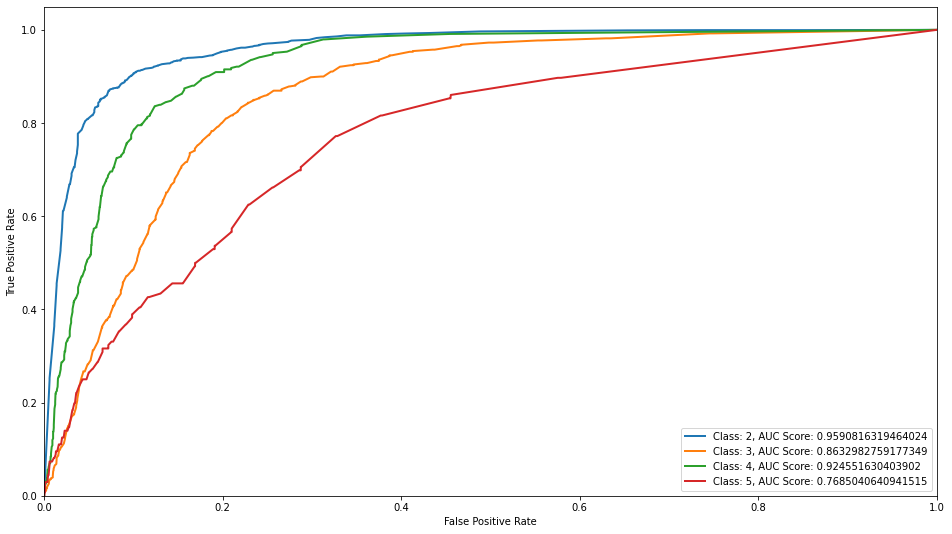

In [26]:
y_score = rf.model.predict_proba(rf.X_test)
y_test_bin = label_binarize(rf.Y_test, classes=[2, 3, 4, 5])
n_classes = y_test_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

_, ax = plt.subplots(1, 1, figsize=(16, 9))

for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
  plt.plot(fpr[i], tpr[i], lw=2, label=f"Class: {i+2}, AUC Score: {auc(fpr[i], tpr[i])}")

ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend();

In [23]:
data['re_escp_hist_1']

2        0
3        1
20       1
31       0
33       0
        ..
59368    0
59382    0
59385    0
59398    0
59499    0
Name: re_escp_hist_1, Length: 14573, dtype: int64

In [14]:
np.max(data['off_1_prs_max'])

4.0